Dataset 1 shape: (65535, 16)
Dataset 2 shape: (70000, 19)
Combined dataset shape: (135535, 35)
MSE: 0.004651798889585716
R2 Score: 0.9638689077032347


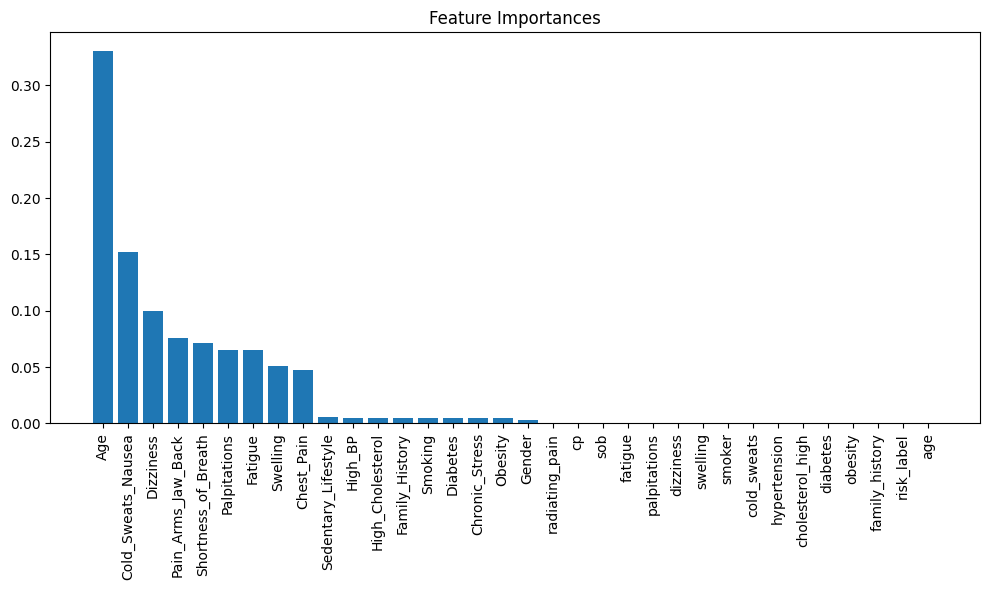

In [22]:
# ML Prediction Analysis Using Provided File Names
# Jupyter Notebook Code

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

model = RandomForestRegressor(n_estimators=200, random_state=42)

import matplotlib.pyplot as plt
import numpy as np

# Use the exact file names you uploaded
file1 = 'heart_disease_risk_dataset_earlymed111.csv'
file2 = 'heart_disease_risk_dataset_earlymed.csv'

# Load datasets
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

print('Dataset 1 shape:', df1.shape)
print('Dataset 2 shape:', df2.shape)

# Combine datasets
combined_df = pd.concat([df1, df2], ignore_index=True)
print('Combined dataset shape:', combined_df.shape)

# Clean data
# Clean data with imputation instead of dropna

df = combined_df.copy()

# Fill numeric columns with mean
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Target column
target_col = 'Heart_Risk'
# change this
X = df.drop(target_col, axis=1)
y = df[target_col]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation for regression
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MSE:', mse)
print('R2 Score:', r2)

# Feature importance plot
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

# Deployment-style prediction function
def predict_new(sample_dict):
    sample_df = pd.DataFrame([sample_dict])
    sample_scaled = scaler.transform(sample_df)
    return model.predict(sample_scaled)[0]


In [4]:
combined_df.columns


Index(['age', 'cp', 'sob', 'fatigue', 'palpitations', 'dizziness', 'swelling',
       'radiating_pain', 'cold_sweats', 'hypertension', 'cholesterol_high',
       'diabetes', 'smoker', 'obesity', 'family_history', 'risk_label',
       'Chest_Pain', 'Shortness_of_Breath', 'Fatigue', 'Palpitations',
       'Dizziness', 'Swelling', 'Pain_Arms_Jaw_Back', 'Cold_Sweats_Nausea',
       'High_BP', 'High_Cholesterol', 'Diabetes', 'Smoking', 'Obesity',
       'Sedentary_Lifestyle', 'Family_History', 'Chronic_Stress', 'Gender',
       'Age', 'Heart_Risk'],
      dtype='object')

In [15]:
df['Heart_Risk'].describe()


count    135535.000000
mean          0.500000
std           0.359331
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Heart_Risk, dtype: float64